# Importing the libraries and reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwur_df = pd.read_csv('cwurData.csv')
cwur_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [3]:
cwur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


# Count of Institutions for each Country for the year 2015

In [26]:
country_grp = cwur_df[cwur_df['year']==2015][['country']].groupby(cwur_df['country']).count()
country_grp = country_grp.rename(columns={'country':'inst_count'})
country_grp.reset_index(inplace=True)

# Listing top countries with count of institutions greater than 50

In [25]:
fifty_plus = country_grp[country_grp['inst_count']>50][['country','inst_count']].sort_values(by='inst_count',ascending=False)
fifty_plus

,country,inst_count
54,USA,229
8,China,83
28,Japan,74
57,United Kingdom,65
18,Germany,55


# Bar Graph showing the count of institutions for above countries

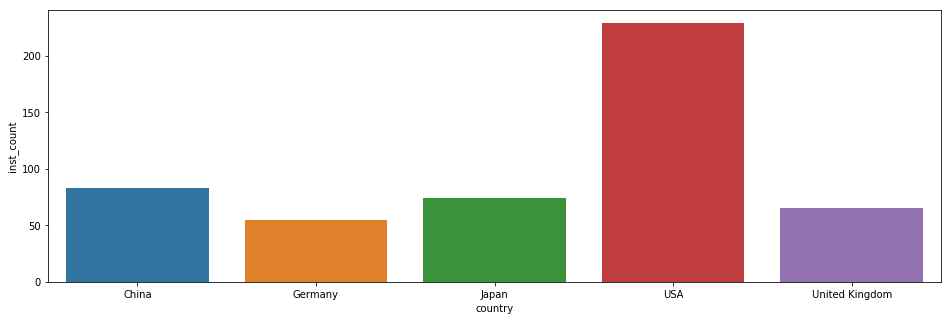

In [22]:
fig_dims=(16,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.barplot(fifty_plus['country'],fifty_plus['inst_count'])

# Box PLots showing the scores of institutions from 2012 to 2015 for South Africa and Hong Kong

In [8]:
SA_df = cwur_df[cwur_df['country']=='South Africa']

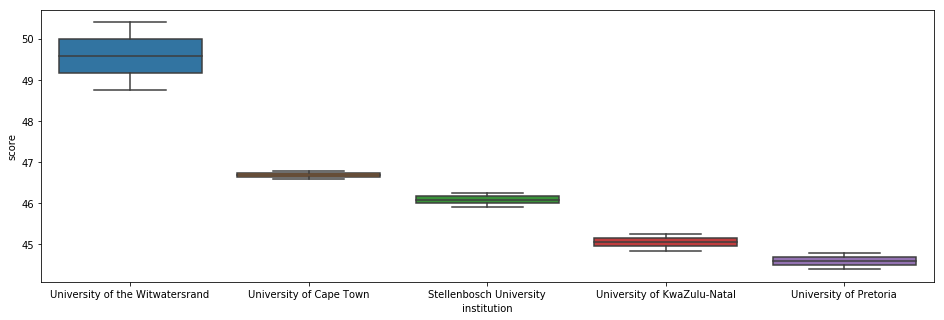

In [27]:
fig_dims=(16,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.boxplot(SA_df['institution'],SA_df['score'])

In [10]:
HK_df = cwur_df[cwur_df['country']=='Hong Kong']

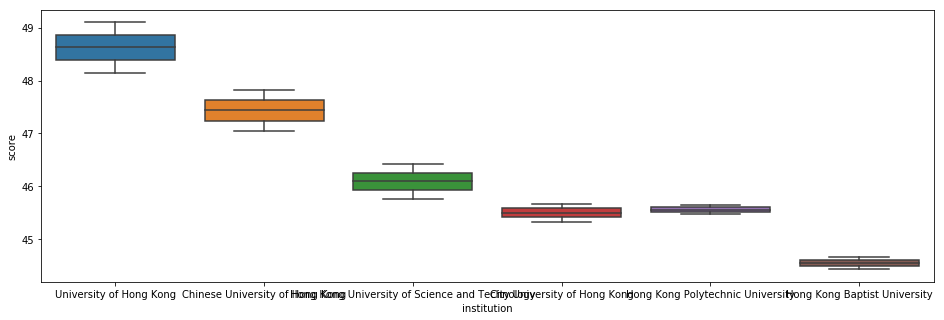

In [28]:
fig_dims=(16,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.boxplot(HK_df['institution'],HK_df['score'])

# Listing top insitutions from each country for 2015 and sorting them on their world_rank

In [30]:
cwur_df[(cwur_df['national_rank']==1) & (cwur_df['year']==2015)][['institution','world_rank','country']].sort_values(by='world_rank')

,institution,world_rank,country
1200,Harvard University,1,USA
1203,University of Cambridge,4,United Kingdom
1212,University of Tokyo,13,Japan
1219,Swiss Federal Institute of Technology in Zurich,20,Switzerland
1222,Hebrew University of Jerusalem,23,Israel
1223,Seoul National University,24,South Korea
1231,University of Toronto,32,Canada
1235,École Polytechnique,36,France
1255,Peking University,56,China
1256,National Taiwan University,57,Taiwan


# Listing Institutions for 2012 based on their patents ranking

In [31]:
cwur_df[cwur_df['year']==2012][['institution','world_rank','national_rank','country','patents']].sort_values(by='patents').head(10)

,institution,world_rank,national_rank,country,patents
1,Massachusetts Institute of Technology,2,2,USA,1
54,University of Florida,55,40,USA,2
13,University of Tokyo,14,1,Japan,3
74,Seoul National University,75,1,South Korea,4
0,Harvard University,1,1,USA,5
8,Columbia University,9,7,USA,5
14,Johns Hopkins University,15,12,USA,7
33,"University of Michigan, Ann Arbor",34,24,USA,8
12,University of Pennsylvania,13,11,USA,9
11,Cornell University,12,10,USA,10
